# Data analysis using pandas, scikit-learn and HoloViews

Load required modules

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
import matplotlib.pyplot as plt
import holoviews as hv

Create some default settings

In [3]:
%matplotlib inline
pd.set_option('display.max_rows', 10)
LARGE_FIGSIZE=(14, 10)
%load_ext holoviews.ipython

The holoviews.ipython extension is already loaded. To reload it, use:
  %reload_ext holoviews.ipython


Read the data, which is in CSV format, and display for inspection.

In [13]:
data = pd.read_csv('data.csv')

In [14]:
data

,ID,IPO8,TBP,CYC1,HPRT1,YWHAZ
0,39,27.409000,29.461500,26.349500,27.238000,25.842667
1,69,26.734500,29.149000,25.751500,26.502333,24.648333
2,106,27.512000,30.032500,26.315000,27.085333,25.630333
3,177,26.640500,28.830000,25.276500,26.254667,24.855667
4,179,27.120000,29.264000,25.861000,26.661667,25.146667
...,...,...,...,...,...,...
162,699,26.750333,29.845000,26.450333,28.355333,27.193000
163,700,26.756667,29.707667,26.743000,28.614667,27.003667
164,702,25.595000,28.607667,25.680500,27.747333,26.082000
165,704,26.831000,30.171000,26.976500,28.608333,27.196333


In [15]:
gene_names = data.columns[1:]

This is gene expression data, create a scatter matrix to visualize correlation.

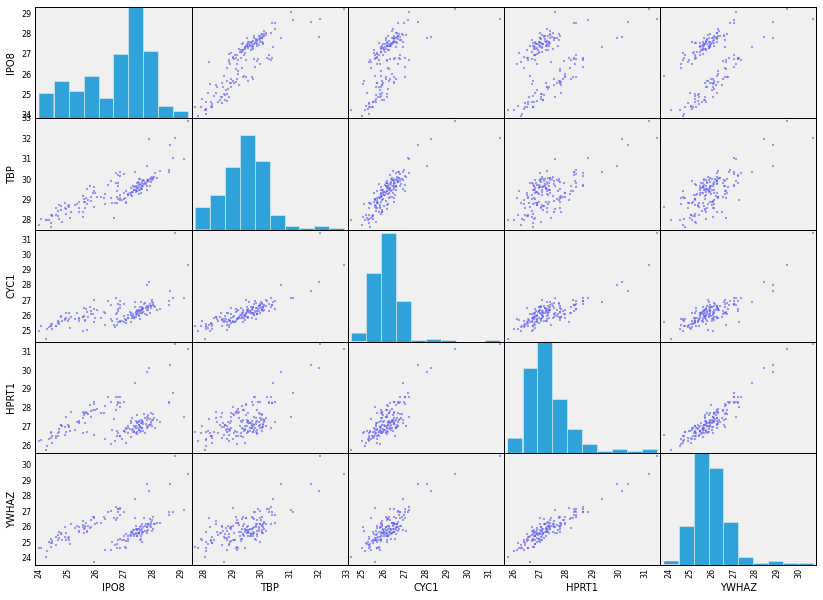

In [17]:
pd.tools.plotting.scatter_matrix(data[gene_names], figsize=(14, 10));

There seem to be two groups of individuals, especially when comparing IPO8 and YWHAZ. Using clustering, we can try to identify the groups these individuals belong to.

In [8]:
genes = data[['IPO8', 'YWHAZ']]

Fit the data using a hierarchical clustering algorithm (Ward). Given the elongated shape of the upper cluster, a low connectivity seems appropirate.

In [9]:
connectivity = kneighbors_graph(genes, n_neighbors=3, include_self=False)

In [10]:
ward_estimator = AgglomerativeClustering(n_clusters=2, linkage='ward', connectivity=connectivity)
ward_estimator.fit(genes);

/home/lucg5005/miniconda/envs/py3k/lib/python3.4/site-packages/sklearn/cluster/hierarchical.py:205: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)


In [11]:
cluster = []
for i in range(2):
    cluster.append(hv.DFrame(genes[ward_estimator.labels_ == i]).scatter('IPO8', 'YWHAZ'))

:Overlay
   .Scatter.I  :Scatter   [IPO8]   (YWHAZ)
   .Scatter.II :Scatter   [IPO8]   (YWHAZ)
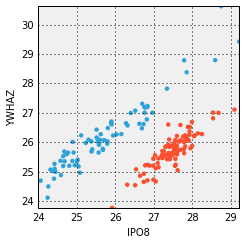

In [12]:
cluster[0] * cluster[1]

It turns out that the gene expression data was obtained in two batches, the following plot shows these batches.

:Overlay
   .Scatter.I  :Scatter   [IPO8]   (YWHAZ)
   .Scatter.II :Scatter   [IPO8]   (YWHAZ)
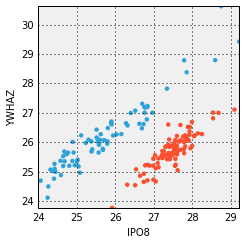

In [19]:
plot_batch1 = hv.DFrame(genes[data['ID'] < 601]).scatter('IPO8', 'YWHAZ')
plot_batch2 = hv.DFrame(genes[data['ID'] >= 601]).scatter('IPO8', 'YWHAZ')
plot_batch2 * plot_batch1